In [14]:
import h5py
%matplotlib notebook
import matplotlib.pyplot as plt

In [5]:
f = h5py.File('data/example.hd5', 'r')

In [3]:
list(f.keys())

['categorical',
 'continuous',
 'dates',
 'ecg_rest',
 'ecg_rest_date',
 'ecg_rest_text',
 'ukb_ecg_rest']

In [4]:
con = f['continuous']
con.get('VentricularRate')[0]

58.0

<IPython.core.display.Javascript object>


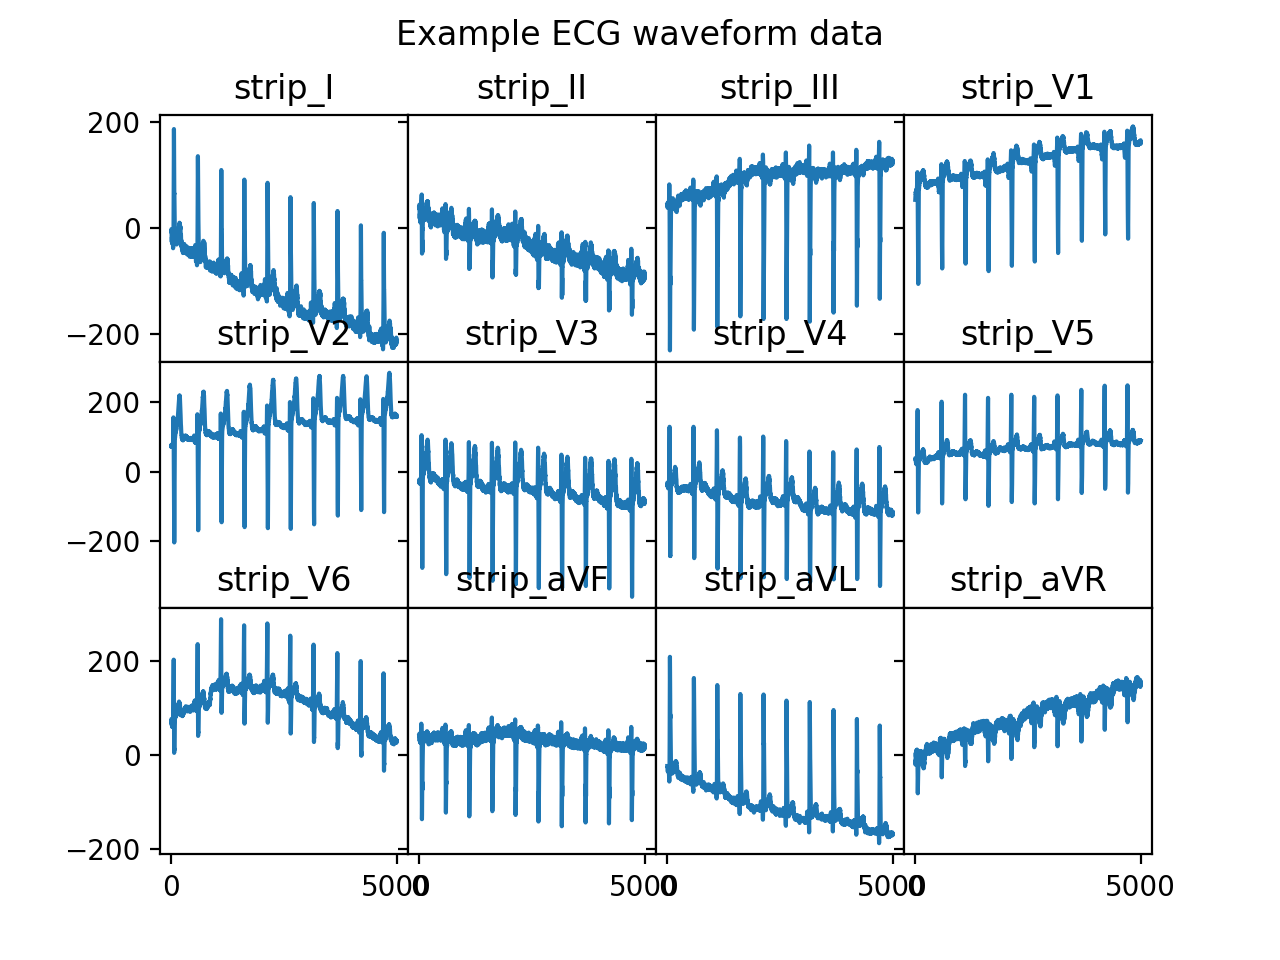

In [79]:
ecg_rest = f['ecg_rest']

ecg_key_string_list = [ 
    "strip_I", 
    "strip_II",
    "strip_III",
    "strip_V1",
    "strip_V2",
    "strip_V3",
    "strip_V4",
    "strip_V5",
    "strip_V6",
    "strip_aVF",
    "strip_aVL",
    "strip_aVR"
]

# Plot start
fig, axs = plt.subplots(3, 4, sharex='col', sharey='row', gridspec_kw={'hspace':0, 'wspace':0})
fig.suptitle('Example ECG waveform data')

for (i, key) in enumerate(ecg_key_string_list):
    wave = ecg_rest.get(key)
    axs[i//4, i%4].set_title(key)
    axs[i//4, i%4].plot(wave)
    
for ax in axs.flat:
    ax.label_outer()


In [72]:
x_list = list()
for (i, key) in enumerate(ecg_key_string_list):
    x = ecg_rest.get(key)[:]
    x_list.append(x)

x_list = np.array(x_list)
x_list

array([[  -6.,   -6.,   -6., ..., -214., -213., -213.],
       [  37.,   36.,   36., ...,  -93.,  -90.,  -87.],
       [  43.,   42.,   42., ...,  121.,  123.,  126.],
       ...,
       [  40.,   39.,   39., ...,   14.,   17.,   20.],
       [ -24.,  -24.,  -24., ..., -167., -168., -169.],
       [ -15.,  -15.,  -15., ...,  154.,  152.,  150.]])

<IPython.core.display.Javascript object>


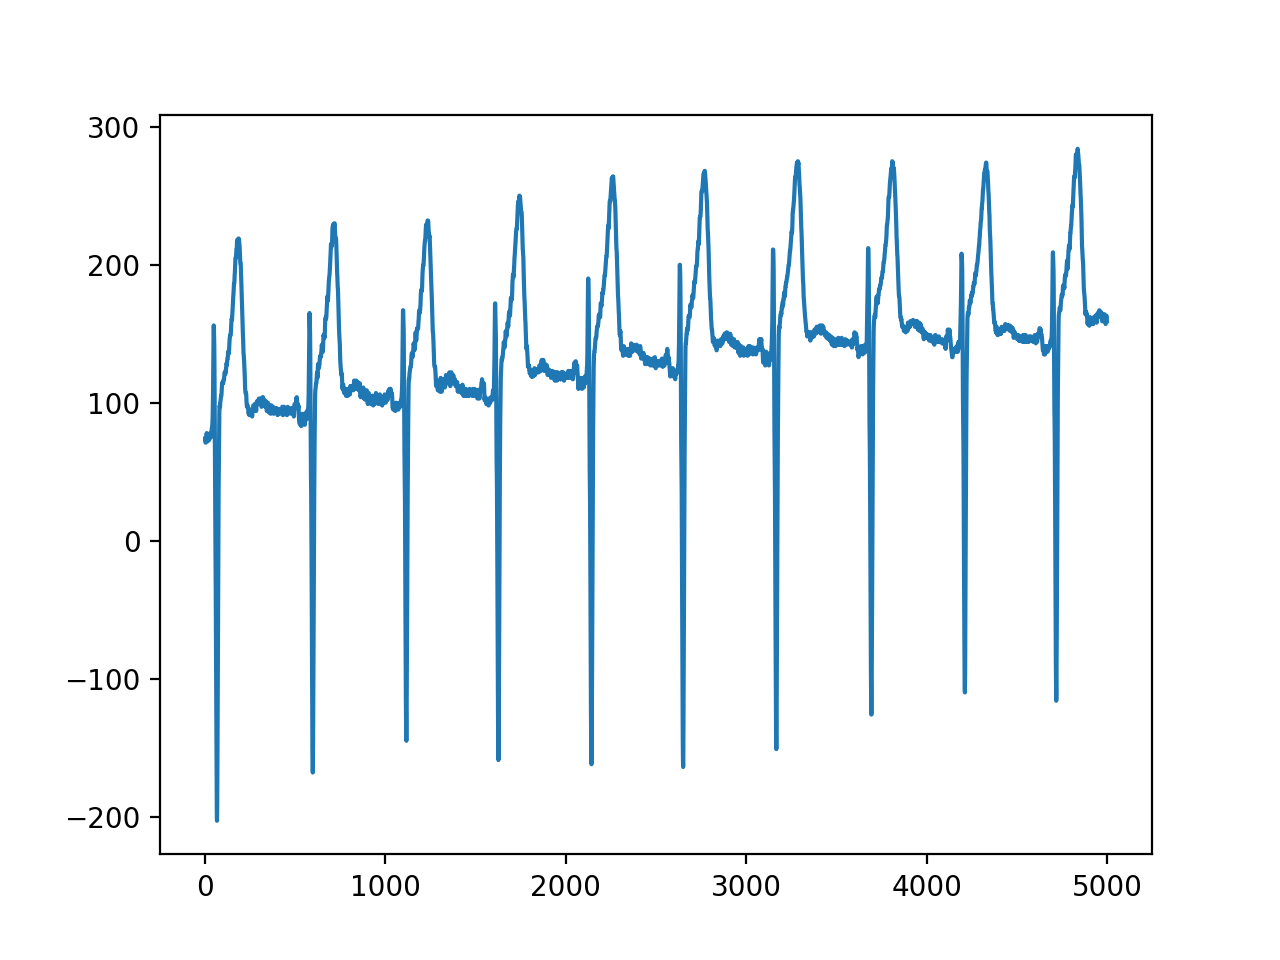

In [78]:
# import numpy as np
# np_arr = np.asarray(ecg_rest.get('strip_aVL')[:])

plt.plot(x_list[4, :])
plt.show()

<IPython.core.display.Javascript object>


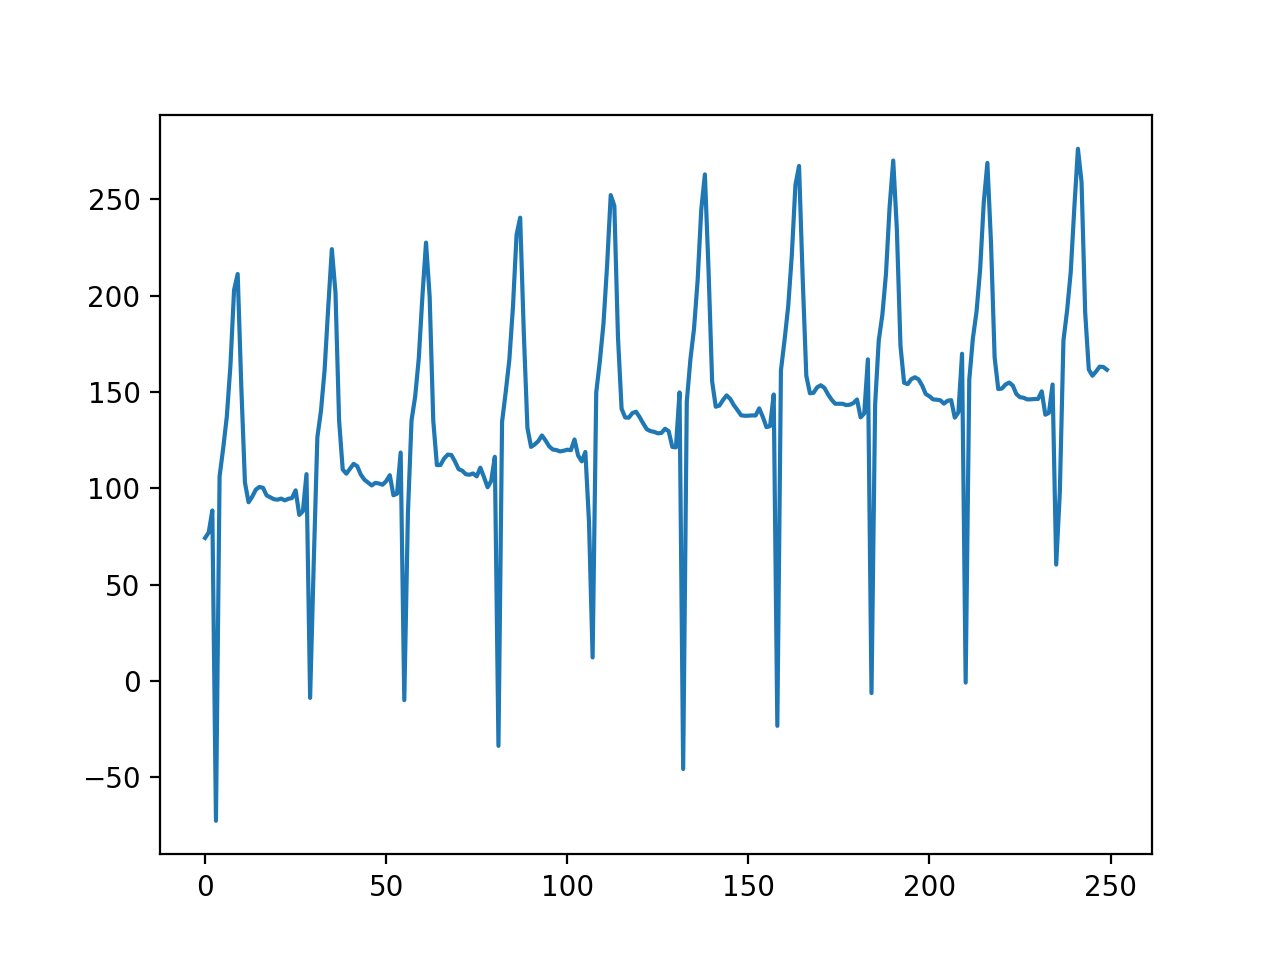

In [77]:
np_arr = x_list.reshape([12, 12//12, 250, 5000//250]).mean(3).mean(1)
plt.plot(np_arr[4, :])
plt.show()